In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 효과_naver_kin_933.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,953):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배 효과_naver_kin_933.txt', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배 효과_naver_kin_933.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 9155)	1
  (1, 91)	1
  (2, 1343)	1
  (3, 10461)	1
  (4, 11699)	1
  (5, 2243)	1
  (6, 9273)	1
  (7, 12080)	1
  (8, 6100)	1
  (9, 6164)	1
  (10, 5549)	1
  (11, 2243)	1
  (12, 9273)	1
  (13, 11699)	1
  (14, 12509)	1
  (15, 6713)	1
  (16, 5083)	1
  (17, 7228)	1
  (18, 2054)	1
  (19, 12446)	1
  (20, 2243)	1
  (21, 9155)	1
  (22, 12412)	1
  (23, 2243)	1
  (24, 1795)	1
  :	:
  (260516, 6231)	1
  (260517, 9976)	1
  (260518, 469)	1
  (260519, 10561)	1
  (260520, 554)	1
  (260521, 469)	1
  (260522, 7289)	1
  (260523, 5329)	1
  (260524, 554)	1
  (260525, 5329)	1
  (260526, 2171)	1
  (260527, 469)	1
  (260528, 12144)	1
  (260529, 10335)	1
  (260530, 5810)	1
  (260531, 469)	1
  (260532, 7906)	1
  (260533, 4029)	1
  (260534, 10561)	1
  (260535, 12412)	1
  (260536, 599)	1
  (260537, 9570)	1
  (260538, 2102)	1
  (260539, 9344)	1
  (260540, 10079)	1


In [8]:
print(vectorize.vocabulary_)

{'전자담배': 9155, '가요': 91, '금연': 1343, '추천': 10461, '하루': 11699, '담배': 2243, '정도': 9273, '헤비': 12080, '스모커': 6100, '스트레스': 6164, '서하': 5549, '흡연': 12509, '아침': 6713, '뿌둥': 5083, '여기저기': 7228, '니코틴': 2054, '후유증': 12446, '효과': 12412, '냄새': 1795, '안나': 6756, '일반': 8563, '아예': 6684, '정착': 9337, '일단': 8552, '느낌': 2018, '차이': 10127, '애초': 6904, '방식': 4229, '자체': 8805, '때문': 2869, '연초': 7360, '고체': 743, '담뱃잎': 2253, '기체': 1471, '승화': 6227, '형태': 12183, '내부': 1765, '코일': 10746, '액체': 6921, '기화': 1486, '증기': 9800, '흡입': 12512, '오히려': 7572, '진짜': 10000, '지금': 9831, '사람': 5121, '가도': 24, '근처': 1286, '처음': 10212, '기기': 1393, '사지': 5196, '몬스터': 3677, '스팟': 6173, '사용': 5166, '완전': 7636, '버튼': 4359, '조작': 9494, '필요': 11669, '충전': 10509, '어쨌다': 7065, '자제': 8796, '입문': 8664, '작별인사': 8830, '다음': 2121, '제대로': 9376, '바톡': 4059, '필터': 11674, '부탁': 4784, '요즘': 7738, '약속': 6963, '반드시': 4096, '결심': 548, '신체': 6437, '변화': 4477, '방법': 4218, '중심': 9745, '보고': 4531, '선택': 5599, '개정': 356, '도로': 2529, '고민': 687, '어디

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'전자담배': 12605,
 '가요': 185,
 '금연': 6658,
 '추천': 1108,
 '하루': 669,
 '담배': 8574,
 '정도': 1409,
 '헤비': 7,
 '스모커': 10,
 '스트레스': 408,
 '서하': 1,
 '흡연': 2301,
 '아침': 197,
 '뿌둥': 1,
 '여기저기': 26,
 '니코틴': 3785,
 '후유증': 9,
 '효과': 2273,
 '냄새': 695,
 '안나': 140,
 '일반': 499,
 '아예': 108,
 '정착': 6,
 '일단': 399,
 '느낌': 322,
 '차이': 203,
 '애초': 16,
 '방식': 419,
 '자체': 296,
 '때문': 1862,
 '연초': 757,
 '고체': 10,
 '담뱃잎': 12,
 '기체': 62,
 '승화': 2,
 '형태': 64,
 '내부': 47,
 '코일': 581,
 '액체': 62,
 '기화': 58,
 '증기': 247,
 '흡입': 435,
 '오히려': 189,
 '진짜': 287,
 '지금': 713,
 '사람': 1573,
 '가도': 21,
 '근처': 54,
 '처음': 626,
 '기기': 536,
 '사지': 23,
 '몬스터': 12,
 '스팟': 5,
 '사용': 3519,
 '완전': 94,
 '버튼': 31,
 '조작': 5,
 '필요': 137,
 '충전': 324,
 '어쨌다': 1,
 '자제': 32,
 '입문': 50,
 '작별인사': 1,
 '다음': 261,
 '제대로': 190,
 '바톡': 17,
 '필터': 121,
 '부탁': 75,
 '요즘': 375,
 '약속': 17,
 '반드시': 112,
 '결심': 108,
 '신체': 313,
 '변화': 260,
 '방법': 1238,
 '중심': 18,
 '보고': 359,
 '선택': 375,
 '개정': 42,
 '도로': 12,
 '고민': 188,
 '어디': 149,
 '블로그': 98,
 '이구': 77,
 '유행': 

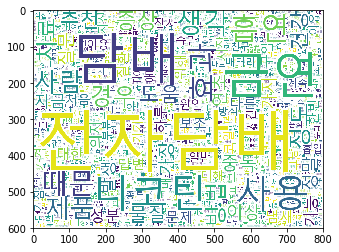

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'전자담배': 9155, '가요': 91, '금연': 1343, '추천': 10461, '하루': 11699, '담배': 2243, '정도': 9273, '헤비': 12080, '스모커': 6100, '스트레스': 6164, '서하': 5549, '흡연': 12509, '아침': 6713, '뿌둥': 5083, '여기저기': 7228, '니코틴': 2054, '후유증': 12446, '효과': 12412, '냄새': 1795, '안나': 6756, '일반': 8563, '아예': 6684, '정착': 9337, '일단': 8552, '느낌': 2018, '차이': 10127, '애초': 6904, '방식': 4229, '자체': 8805, '때문': 2869, '연초': 7360, '고체': 743, '담뱃잎': 2253, '기체': 1471, '승화': 6227, '형태': 12183, '내부': 1765, '코일': 10746, '액체': 6921, '기화': 1486, '증기': 9800, '흡입': 12512, '오히려': 7572, '진짜': 10000, '지금': 9831, '사람': 5121, '가도': 24, '근처': 1286, '처음': 10212, '기기': 1393, '사지': 5196, '몬스터': 3677, '스팟': 6173, '사용': 5166, '완전': 7636, '버튼': 4359, '조작': 9494, '필요': 11669, '충전': 10509, '어쨌다': 7065, '자제': 8796, '입문': 8664, '작별인사': 8830, '다음': 2121, '제대로': 9376, '바톡': 4059, '필터': 11674, '부탁': 4784, '요즘': 7738, '약속': 6963, '반드시': 4096, '결심': 548, '신체': 6437, '변화': 4477, '방법': 4218, '중심': 9745, '보고': 4531, '선택': 5599, '개정': 356, '도로': 2529, '고민': 687, '어디

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('전자담배', 12605.0)
('담배', 8574.0)
('금연', 6658.0)
('니코틴', 3785.0)
('사용', 3519.0)
('흡연', 2301.0)
('효과', 2273.0)
('때문', 1862.0)
('생각', 1807.0)
('사람', 1573.0)
('제품', 1550.0)
('경우', 1413.0)
('정도', 1409.0)
('치료', 1258.0)
('방법', 1238.0)
('증상', 1174.0)
('도움', 1148.0)
('추천', 1108.0)
('건강', 1091.0)
('물질', 939.0)
('중독', 873.0)
('정말', 853.0)
('이상', 811.0)
('가장', 809.0)
('질문', 804.0)
('가지', 787.0)
('발생', 763.0)
('연초', 757.0)
('지금', 713.0)
('기능', 712.0)
('성분', 699.0)
('냄새', 695.0)
('문제', 695.0)
('하루', 669.0)
('다른', 669.0)
('보조', 665.0)
('대한', 661.0)
('답변', 657.0)
('의지', 646.0)
('질환', 629.0)
('처음', 626.0)
('위해', 624.0)
('구입', 619.0)
('시작', 608.0)
('한번', 601.0)
('운동', 587.0)
('코일', 581.0)
('가격', 578.0)
('전자', 565.0)
('이유', 550.0)
('이용', 546.0)
('피부', 541.0)
('기기', 536.0)
('원인', 533.0)
('대해', 521.0)
('자신', 517.0)
('구매', 502.0)
('일반', 499.0)
('기침', 497.0)
('그냥', 490.0)
('또한', 483.0)
('습관', 469.0)
('하나', 464.0)
('시간', 463.0)
('부분', 463.0)
('배터리', 446.0)
('흡입', 435.0)
('계속', 421.0)
('방식', 419.0)
('친구', 413

('구경', 18.0)
('최저', 18.0)
('잡고', 18.0)
('정해', 18.0)
('당신', 18.0)
('인간', 18.0)
('성장호르몬', 18.0)
('전반', 18.0)
('제기', 18.0)
('최소한', 18.0)
('정밀', 18.0)
('오직', 18.0)
('화장', 18.0)
('야기', 18.0)
('증발', 18.0)
('동맥', 18.0)
('도매', 18.0)
('변경', 18.0)
('연결', 18.0)
('애용', 18.0)
('번은', 18.0)
('조선', 18.0)
('지급', 18.0)
('중고', 18.0)
('접촉', 18.0)
('외관', 18.0)
('노하우', 18.0)
('연가', 18.0)
('아이스', 18.0)
('추세', 18.0)
('사람과', 18.0)
('시각', 18.0)
('합의', 18.0)
('국립', 18.0)
('가글', 18.0)
('직장인', 18.0)
('액상', 18.0)
('견과류', 18.0)
('건데', 18.0)
('공통', 18.0)
('지지', 18.0)
('매출', 18.0)
('성장기', 18.0)
('전기', 18.0)
('차고', 18.0)
('갈증', 18.0)
('부어', 18.0)
('작업', 18.0)
('티비', 18.0)
('고비', 18.0)
('월드', 18.0)
('검진', 18.0)
('혈전', 18.0)
('대장염', 18.0)
('아이템', 18.0)
('공격', 18.0)
('점심', 18.0)
('선배', 18.0)
('문병원', 18.0)
('흉통', 18.0)
('발현', 18.0)
('김치', 18.0)
('발휘', 18.0)
('진해', 18.0)
('해열', 18.0)
('양기', 18.0)
('탈취', 18.0)
('체온', 18.0)
('버거씨병', 18.0)
('치기', 18.0)
('인스턴트', 18.0)
('유산', 18.0)
('바톡', 17.0)
('약속', 17.0)
('수익', 17.0)
('불균형', 

('몇몇', 7.0)
('수행', 7.0)
('인도', 7.0)
('볼펜', 7.0)
('이해해', 7.0)
('바이퍼', 7.0)
('취약', 7.0)
('바램', 7.0)
('공익', 7.0)
('추석', 7.0)
('좁쌀', 7.0)
('색소', 7.0)
('부로', 7.0)
('그닥', 7.0)
('블루', 7.0)
('용제', 7.0)
('나나', 7.0)
('글구', 7.0)
('재채기', 7.0)
('바코', 7.0)
('연세', 7.0)
('구별', 7.0)
('파워', 7.0)
('신후', 7.0)
('물리', 7.0)
('비례', 7.0)
('고로', 7.0)
('애정', 7.0)
('충천', 7.0)
('독해', 7.0)
('피곤', 7.0)
('불빛', 7.0)
('헤드', 7.0)
('튀어', 7.0)
('무향', 7.0)
('삼일', 7.0)
('별거', 7.0)
('대감', 7.0)
('사자', 7.0)
('수건', 7.0)
('어딘가', 7.0)
('적기', 7.0)
('취업', 7.0)
('센서', 7.0)
('대리', 7.0)
('일리', 7.0)
('고유', 7.0)
('아세틸콜린', 7.0)
('아미노산', 7.0)
('뇌신경', 7.0)
('중성', 7.0)
('중화', 7.0)
('지로', 7.0)
('빌드', 7.0)
('제로스', 7.0)
('작심삼일', 7.0)
('조깅', 7.0)
('실력', 7.0)
('포럼', 7.0)
('내뿜는', 7.0)
('파리', 7.0)
('고무', 7.0)
('가가', 7.0)
('경영', 7.0)
('각자', 7.0)
('조립', 7.0)
('찬성', 7.0)
('수고', 7.0)
('따위', 7.0)
('도감', 7.0)
('완료', 7.0)
('빨때', 7.0)
('던힐', 7.0)
('마일드세븐', 7.0)
('오래오래', 7.0)
('액취증', 7.0)
('것이므', 7.0)
('리가', 7.0)
('통상', 7.0)
('물량', 7.0)
('발품', 7.0)
('탄화', 

('소관', 4.0)
('상반기', 4.0)
('디에틸프탈레이트', 4.0)
('틸핵', 4.0)
('실프', 4.0)
('샘플', 4.0)
('취사', 4.0)
('취사량', 4.0)
('재위', 4.0)
('계류', 4.0)
('프탈레이트', 4.0)
('프탈', 4.0)
('트라고', 4.0)
('가소제', 4.0)
('유추', 4.0)
('추론', 4.0)
('정확', 4.0)
('전날', 4.0)
('러시', 4.0)
('미각', 4.0)
('전면', 4.0)
('중딩', 4.0)
('낭패', 4.0)
('알기', 4.0)
('면제', 4.0)
('명과', 4.0)
('친척', 4.0)
('피나', 4.0)
('인디고', 4.0)
('시골', 4.0)
('우연', 4.0)
('실사', 4.0)
('할껀', 4.0)
('해외여행', 4.0)
('미달', 4.0)
('이씨', 4.0)
('외양', 4.0)
('마니아', 4.0)
('도구로', 4.0)
('노예', 4.0)
('김은지', 4.0)
('총장', 4.0)
('민주당', 4.0)
('외벽', 4.0)
('항원제시', 4.0)
('토카', 4.0)
('삼각', 4.0)
('박테리아', 4.0)
('답니', 4.0)
('취한', 4.0)
('주정은', 4.0)
('사기꾼', 4.0)
('애원', 4.0)
('부끄러움', 4.0)
('입지', 4.0)
('식은땀', 4.0)
('자구', 4.0)
('어혈', 4.0)
('갈비뼈', 4.0)
('괜찬', 4.0)
('세이프', 4.0)
('마르고', 4.0)
('입구', 4.0)
('장터', 4.0)
('송하', 4.0)
('사나', 4.0)
('조성', 4.0)
('정품액', 4.0)
('제조품', 4.0)
('이안', 4.0)
('개포', 4.0)
('폐쇄', 4.0)
('기관지확장증', 4.0)
('농성', 4.0)
('녹슨', 4.0)
('섬망', 4.0)
('히스테리', 4.0)
('혼미', 4.0)
('항진균제', 4.0)
('지체', 4.0

('말썽', 2.0)
('손안', 2.0)
('썻다', 2.0)
('싶어할껀데', 2.0)
('빠릴', 2.0)
('사내', 2.0)
('마켓', 2.0)
('서지', 2.0)
('어쩧', 2.0)
('격전', 2.0)
('한바탕', 2.0)
('내열', 2.0)
('반기', 2.0)
('로타', 2.0)
('하여튼', 2.0)
('잠재', 2.0)
('이목', 2.0)
('리해', 2.0)
('흔적', 2.0)
('강점', 2.0)
('때제', 2.0)
('데모', 2.0)
('납품', 2.0)
('개체', 2.0)
('노르에피네프린', 2.0)
('바소프레신', 2.0)
('응고', 2.0)
('묘사', 2.0)
('여자라서', 2.0)
('마우스피스', 2.0)
('고마움', 2.0)
('살살', 2.0)
('물티슈', 2.0)
('럭스킷', 2.0)
('대륙', 2.0)
('신맛', 2.0)
('서핑', 2.0)
('겨냥', 2.0)
('인척', 2.0)
('대수술', 2.0)
('문턱', 2.0)
('뒷받침', 2.0)
('군입', 2.0)
('철심', 2.0)
('호가', 2.0)
('방도', 2.0)
('바이어', 2.0)
('카르', 2.0)
('구나', 2.0)
('이제야', 2.0)
('전무', 2.0)
('국장', 2.0)
('우뚝', 2.0)
('메리엇', 2.0)
('데렉', 2.0)
('신도', 2.0)
('잠금장치', 2.0)
('부족함', 2.0)
('탈피', 2.0)
('만배', 2.0)
('퉤퉤', 2.0)
('푸지', 2.0)
('아만다', 2.0)
('체격', 2.0)
('면접', 2.0)
('만점', 2.0)
('실때', 2.0)
('외적인', 2.0)
('통틀어', 2.0)
('매입', 2.0)
('임대료', 2.0)
('대출', 2.0)
('순정', 2.0)
('우후죽순', 2.0)
('지난달', 2.0)
('스위스', 2.0)
('대란', 2.0)
('양복', 2.0)
('대결', 2.0)
('인심', 2.0)
('드

('등뼈', 2.0)
('풍문', 2.0)
('폐유', 2.0)
('폐염', 2.0)
('목안', 2.0)
('무채', 2.0)
('접시', 2.0)
('말랭이', 2.0)
('감귤', 2.0)
('하룻밤', 2.0)
('부추', 2.0)
('생즙', 2.0)
('모과차', 2.0)
('질경이', 2.0)
('황매화', 2.0)
('난방', 2.0)
('분필', 2.0)
('댕기', 2.0)
('진자', 2.0)
('개꼴', 2.0)
('짓거리', 2.0)
('패배', 2.0)
('원랜', 2.0)
('검찰', 2.0)
('소환장', 2.0)
('절도', 2.0)
('무고', 2.0)
('판사', 2.0)
('임해', 2.0)
('공탁', 2.0)
('배임', 2.0)
('임무', 2.0)
('배하', 2.0)
('제삼자', 2.0)
('교부', 2.0)
('옆방', 2.0)
('불리', 2.0)
('물고기', 2.0)
('꽁치', 2.0)
('틱택', 2.0)
('데카', 2.0)
('미라클', 2.0)
('버진', 2.0)
('세탁소', 2.0)
('드럼세탁기', 2.0)
('드라이클리닝', 2.0)
('핍박', 2.0)
('서애', 2.0)
('실만', 2.0)
('인과', 2.0)
('한주', 2.0)
('회신', 2.0)
('환의', 2.0)
('이사도', 2.0)
('배면', 2.0)
('쑥뜸', 2.0)
('담배곽', 2.0)
('안성맞춤', 2.0)
('세배', 2.0)
('의익', 2.0)
('이허', 2.0)
('주먹', 2.0)
('살코기', 2.0)
('통밀', 2.0)
('리바', 2.0)
('천해', 2.0)
('모관', 2.0)
('엠비엔', 2.0)
('자임', 2.0)
('독서', 2.0)
('스환', 2.0)
('강낭콩', 2.0)
('반찬', 2.0)
('스테인레스', 2.0)
('유리컵', 2.0)
('웅진', 2.0)
('코웨이', 2.0)
('본부', 2.0)
('윤재식', 2.0)
('합병', 2.0)
('이병', 2.

('이태원', 1.0)
('기업인', 1.0)
('만들껀데', 1.0)
('케티엔지', 1.0)
('스케일', 1.0)
('제네럴', 1.0)
('리즈', 1.0)
('골칫', 1.0)
('포탈', 1.0)
('강구', 1.0)
('초초함', 1.0)
('깜짝선물', 1.0)
('물속', 1.0)
('그럴떄', 1.0)
('야습', 1.0)
('달좀넘엇습니', 1.0)
('설곳', 1.0)
('부스', 1.0)
('빠샤', 1.0)
('을지', 1.0)
('향계', 1.0)
('애플', 1.0)
('크런치', 1.0)
('샤베트', 1.0)
('티라미슈', 1.0)
('헤이즐넛', 1.0)
('행정자치부', 1.0)
('과세표준', 1.0)
('자중', 1.0)
('킹소', 1.0)
('더프', 1.0)
('어치', 1.0)
('화도', 1.0)
('박동수', 1.0)
('좀체', 1.0)
('즉그', 1.0)
('페포', 1.0)
('호수', 1.0)
('일본여행', 1.0)
('칸수', 1.0)
('아레스', 1.0)
('인채', 1.0)
('무헤', 1.0)
('원대', 1.0)
('넘나듭니', 1.0)
('구력', 1.0)
('일렉트로닉', 1.0)
('튜버', 1.0)
('가회', 1.0)
('점심시간', 1.0)
('개포동', 1.0)
('동우', 1.0)
('뽀드락', 1.0)
('왜몸', 1.0)
('명꼴', 1.0)
('거담제', 1.0)
('처치', 1.0)
('폐농', 1.0)
('폐등', 1.0)
('조청', 1.0)
('청과', 1.0)
('무청', 1.0)
('쭈욱', 1.0)
('대접', 1.0)
('자연농법', 1.0)
('반찬거리', 1.0)
('반주', 1.0)
('복용량', 1.0)
('찻순갈', 1.0)
('땅속', 1.0)
('채굴', 1.0)
('분별', 1.0)
('고추장', 1.0)
('꼬치', 1.0)
('의학사전', 1.0)
('진정작용', 1.0)
('항아', 1.0)
('필락', 1.0)
('시아', 1.0)


('소작', 1.0)
('열성', 1.0)
('압통성', 1.0)
('보균', 1.0)
('단핵구', 1.0)
('폐쇄심', 1.0)
('데노', 1.0)
('연하', 1.0)
('언어장애', 1.0)
('교합', 1.0)
('목젓', 1.0)
('쏙쏙쏙', 1.0)
('이문구', 1.0)
('어기', 1.0)
('장철', 1.0)
('방재', 1.0)
('셧을떄', 1.0)
('공군', 1.0)
('복무', 1.0)
('턱턱', 1.0)
('씨발', 1.0)
('비일', 1.0)
('강좌', 1.0)
('괴력', 1.0)
('츄레', 1.0)
('피땀', 1.0)
('번돈', 1.0)
('년후', 1.0)
('글씨스', 1.0)
('고비인', 1.0)
('퇴사', 1.0)
('됐느데냄새', 1.0)
('명임', 1.0)
('누나', 1.0)
('현도', 1.0)
('다라도', 1.0)
('오존', 1.0)
('과잉행동', 1.0)
('답일', 1.0)
('김지훈', 1.0)
('녹변', 1.0)
('출혈량', 1.0)
('애로', 1.0)
('창백', 1.0)
('화생', 1.0)
('검거', 1.0)
('열등', 1.0)
('둘레', 1.0)
('맹장', 1.0)
('혼돈', 1.0)
('어패류', 1.0)
('노로바이러스', 1.0)
('천하', 1.0)
('방명록', 1.0)
('티오', 1.0)
('윤철입니', 1.0)
('포토', 1.0)
('격심', 1.0)
('어도', 1.0)
('분문', 1.0)
('중압감', 1.0)
('장기로', 1.0)
('어버지', 1.0)
('면력', 1.0)
('상락', 1.0)
('수차', 1.0)
('종근당', 1.0)
('퍼뜨리세', 1.0)
('울상', 1.0)
('지은', 1.0)
('어쩌겠습', 1.0)
('합심', 1.0)
('뭣한데', 1.0)
('졸라', 1.0)
('스트리레스', 1.0)
('덩달아', 1.0)
('재형', 1.0)
('물집', 1.0)
('평안', 1.0)
('각생', 1.0)
(

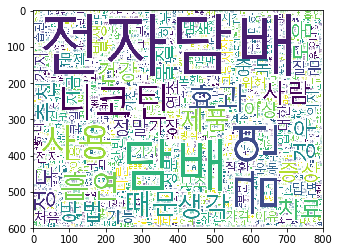

In [15]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')